<a href="https://colab.research.google.com/github/jiku100/2020-2-machine-running-proejct/blob/master/assignment7/%EC%8B%A0%EC%84%9D%EA%B2%BD_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cluster**

# 1. Load Data
<hr>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values
print(data.shape)
print(f"{data[0][0]} {data[0][1]}")

(200, 2)
15 39


In [9]:
X = data[:, 0]
Y = data[:, 1]
print(X.shape)
print(Y.shape)

(200,)
(200,)


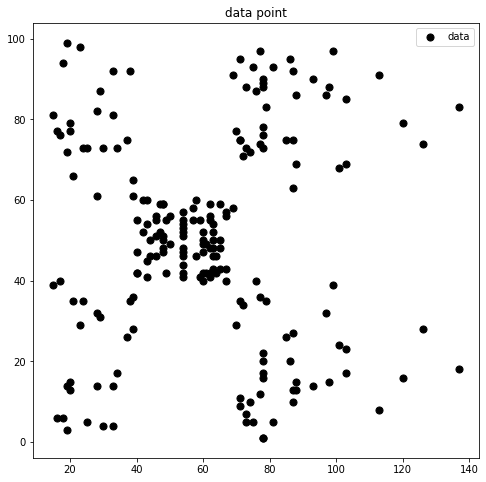

In [16]:
plt.figure(1, figsize=(8,8))
plt.scatter(X,Y, s= 50, c="k", label="data")
plt.title("data point")
plt.legend()
plt.show()